# Benchmark with reference : Chen et. al. NatPhoton

In this note, I will compare the results from my code and the results in the references.

## Verify 1

[A planar dielectric antenna for directional single-photon emission and near-unity collection efficiencyA planar dielectric antenna for directional single-photon emission and near-unity collection efficiency](https://www.nature.com/articles/nphoton.2010.312https://www.nature.com/articles/nphoton.2010.312)

![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fnphoton.2010.312/MediaObjects/41566_2011_Article_BFnphoton2010312_Fig1_HTML.jpg?as=webphttps://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fnphoton.2010.312/MediaObjects/41566_2011_Article_BFnphoton2010312_Fig1_HTML.jpg?as=webp)

we will regenerate Fig1.

In [2]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

## Define the basci parameters

### Structure 1

In [3]:
WL0 = 580e-9
nUp = 1
nDn = 1

# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 400e-9
dl[1] = 600e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn - 1] + dis

# Dipole direction
# phi = np.pi / 2 + np.pi / 6
# dx = np.sin(16 / 180 * np.pi) * np.cos(phi)
# dy = np.sin(16 / 180 * np.pi) * np.sin(phi)
# dz = np.cos(16 / 180 * np.pi)
# p0 = np.array([dx, dy, dz])
p0 = np.array([0, 0, 1])

# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1.78**2
Eplist[1] = 1.5**2
Eplist[0] = 1

D1 = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200

NA=1.78
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)


2020-07-19 15:04:28:The Basic Parameters Have Been Initialized!!!


In [4]:
# Initialize the Green Function
D1.Cal_Green_List(kx_grid, ky_grid)

2020-07-19 15:05:23: The Green Function Has Been Prepared


0

In [5]:
# To calculate and plot the pattern for a given p0
Pattern1 = D1.Cal_PatternUp_List_QD_p1p2(p0, p0)

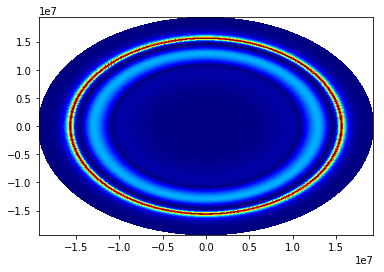

In [6]:
fig1 = plt.figure()
plt.pcolormesh(kx_grid,ky_grid,Pattern1, cmap='jet')
plt.savefig("./Figures/VerifyChenStr12D.png")
plt.show()

In [7]:
Pat1_rho,Pat1_phi=D1.Cal_RhoPhi_Dis(Pattern1)
nPat1_rho=Pat1_rho/np.max(Pat1_rho)
nPat1_phi=Pat1_phi/np.max(Pat1_phi)

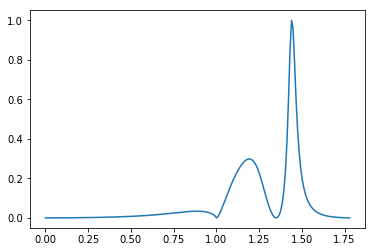

In [8]:
fig2=plt.figure()
plt.plot(krho/D1.k0,nPat1_rho)
plt.savefig("./Figures/VerifyChenStr1DRho.png")
plt.show()

## Structure 2

In [9]:
WL0 = 580e-9
nUp = 1
nDn = 1

# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 150e-9
dl[1] = 350e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn - 1] + dis

# Dipole direction
# phi = np.pi / 2 + np.pi / 6
# dx = np.sin(16 / 180 * np.pi) * np.cos(phi)
# dy = np.sin(16 / 180 * np.pi) * np.sin(phi)
# dz = np.cos(16 / 180 * np.pi)
# p0 = np.array([dx, dy, dz])
p0 = np.array([0, 0, 1])

# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1.78**2
Eplist[1] = 1.5**2
Eplist[0] = 1

D2 = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200

NA=1.78
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)

# Initialize the Green Function
D2.Cal_Green_List(kx_grid, ky_grid)
# To calculate and plot the pattern for a given p0
Pattern2 = D2.Cal_PatternUp_List_QD_p1p2(p0, p0)

2020-07-19 15:05:24:The Basic Parameters Have Been Initialized!!!
2020-07-19 15:06:14: The Green Function Has Been Prepared


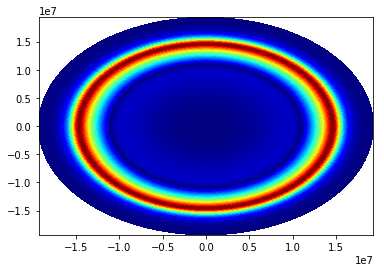

In [10]:
fig1 = plt.figure()
plt.pcolormesh(kx_grid,ky_grid,Pattern2, cmap='jet')
plt.savefig("./Figures/VerifyChenStr22D.png")
plt.show()

In [11]:
Pat2_rho,Pat2_phi=D2.Cal_RhoPhi_Dis(Pattern2)
nPat2_rho=Pat2_rho/np.max(Pat2_rho)
nPat2_phi=Pat2_phi/np.max(Pat2_phi)

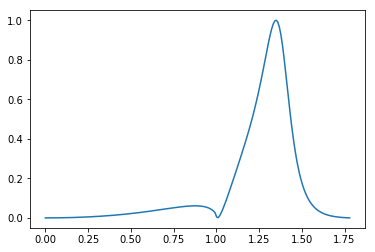

In [12]:
fig2=plt.figure()
plt.plot(krho/D2.k0,nPat2_rho)
plt.savefig("./Figures/VerifyChenStr2DRho.png")
plt.show()

## Structure 3

In [13]:
WL0 = 580e-9
nUp = 1
nDn = 1

# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 445e-9
dl[1] = 450e-9
dl[0] = 0

# The position of the dipole
POSD = dl[nDn - 1] + dis

# Dipole direction
# phi = np.pi / 2 + np.pi / 6
# dx = np.sin(16 / 180 * np.pi) * np.cos(phi)
# dy = np.sin(16 / 180 * np.pi) * np.sin(phi)
# dz = np.cos(16 / 180 * np.pi)
# p0 = np.array([dx, dy, dz])
p0 = np.array([0, 0, 1])

# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[2] = 1.78**2
Eplist[1] = 1**2
Eplist[0] = 1

D3 = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 200
num_ky = 200

NA=1.78
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * D1.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)

# Initialize the Green Function
D3.Cal_Green_List(kx_grid, ky_grid)
# To calculate and plot the pattern for a given p0
Pattern3 = D3.Cal_PatternUp_List_QD_p1p2(p0, p0)

2020-07-19 15:06:16:The Basic Parameters Have Been Initialized!!!
2020-07-19 15:07:04: The Green Function Has Been Prepared


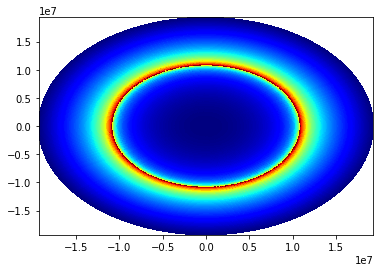

In [14]:
fig1 = plt.figure()
plt.pcolormesh(kx_grid,ky_grid,Pattern3, cmap='jet')
plt.savefig("./Figures/VerifyChenStr32D.png")
plt.show()

In [15]:
Pat3_rho,Pat3_phi=D3.Cal_RhoPhi_Dis(Pattern3)
nPat3_rho=Pat3_rho/np.max(Pat3_rho)
nPat3_phi=Pat3_phi/np.max(Pat3_phi)

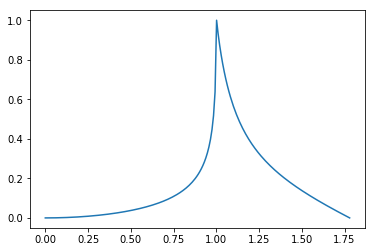

In [16]:
fig2=plt.figure()
plt.plot(krho/D3.k0,nPat3_rho)
plt.savefig("./Figures/VerifyChenStr3DRho.png")
plt.show()

## Summary
finally we plot the results together

C:\Users\xiail\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  
C:\Users\xiail\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arcsin
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\xiail\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arcsin
  after removing the cwd from sys.path.


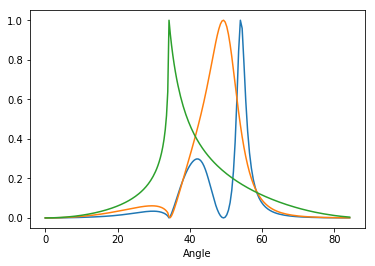

In [17]:
fig3=plt.figure()
plt.plot(np.arcsin(krho/D1.k0/1.78)/np.pi*180,nPat1_rho)
plt.plot(np.arcsin(krho/D1.k0/1.78)/np.pi*180,nPat2_rho)
plt.plot(np.arcsin(krho/D1.k0/1.78)/np.pi*180,nPat3_rho)
plt.xlabel('Angle')
plt.savefig("./Figures/VerifyChenTogetherRho.png")
plt.show()

This results are the same with the reference.